# Desafío Variables
### Nombre: Thomas Peet, Braulio Aguila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Juan Pablo Ramírez
### Fecha: 01-07-2022

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Descripción
La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente, esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda seguir profundizando en la base de datos Quality of Government, de la Universidad de Gotemburgo.



### Requerimiento
---
**1) Importar un csv (2 puntos)**: Importe el set de datos creados por usted al final de la sesión pasada.

In [45]:
df = pd.read_csv('subsample_tpm_demo.csv',index_col=0)
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
49,0.724,DMA,Caribbean,12613.7200,NaN,NaN,5.46,NaN,5.485833
188,0.794,URY,LatAm,12804.8400,3.454000,6.200000,6.03,24.799999,8.581491
175,0.836,ARE,NorthAfrica,20310.1090,NaN,7.200000,1.91,NaN,3.643986
25,0.552,MMR,SouthEastAsia,5733.3701,51.418999,41.099998,0.70,20.000000,2.275755
115,0.645,MAR,NorthAfrica,3999.5601,33.179001,26.799999,0.43,22.000000,5.907778
...,...,...,...,...,...,...,...,...,...
48,0.923,DNK,WesternDem,37406.7620,5.627000,3.000000,9.64,18.900000,10.804957
33,0.764,LKA,SouthAsia,5466.8701,20.541000,8.300000,2.37,14.100000,3.503350
57,0.734,FJI,Pacific,3848.7200,0.880000,NaN,NaN,26.500000,4.487499
34,0.394,TCD,SubSaharian,1651.0500,NaN,89.400002,0.64,NaN,3.621164


---
**2) Importar su conjunto de funciones (2 puntos).** Para ello deberás:
- Generar un archivo `ancilliary_funcs.py` para guardar las funciones creadas
en la sesión pasada e importe.
- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos
de la muestra importada

In [46]:
import ancilliary_funcs as func
_ = pd.Series(df.select_dtypes(np.number).columns).apply(lambda x: func.null_analyzer(df, x, print_list=False))

La columna undp_hdi tiene 6 datos nulos de un total de 97, correspondientes al 6.19%
La columna gle_cgdpc tiene 1 datos nulos de un total de 97, correspondientes al 1.03%
La columna imf_pop tiene 24 datos nulos de un total de 97, correspondientes al 24.74%
La columna wef_imort tiene 21 datos nulos de un total de 97, correspondientes al 21.65%
La columna who_alc2000 tiene 7 datos nulos de un total de 97, correspondientes al 7.22%
La columna who_tobt tiene 31 datos nulos de un total de 97, correspondientes al 31.96%
La columna wdi_exph tiene 1 datos nulos de un total de 97, correspondientes al 1.03%


---
**3) Estimar el puntaje Z de una variable (2 puntos):** Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de
dicha variable. Recuerde que para calcular el puntaje z de una observación se
utiliza la fórmula: $z_i = ( x_i − x ) / \sigma(x)$
- Para ordenar los valores pueden utilizar la función `sort_values` del `DataFrame`
analizado. Lean la documentación asociada al argumento `by`.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con
`dropna`. Lean la documentación asociada al argumento `subset`.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
¿Qué características en común se encuentran?

In [76]:
"""
TODO:
- Seleccionar 10 primeras y 10 ultimas filas usando head y tail. 
- Comentar resultados. Fue interesante en la clase la relación entre locación (ht_region) y ptje Z en el caso en que se eligio el pib per capita.
"""

'\nTODO:\n- Seleccionar 10 primeras y 10 ultimas filas usando head y tail. \n- Comentar resultados. Fue interesante en la clase la relación entre locación (ht_region) y ptje Z en el caso en que se eligio el pib per capita.\n'

In [48]:
# La columnas seleccionada podría ser gle_cgdpc (PIB per cápita) o wdi_exph (Government expenditure on health, total (% of GDP)) según lo visto en el punto anterior ya que tienen solo 1 dato nulo.
columna = 'gle_cgdpc'
nombre_nueva_col = f'ptje_z_{columna}'
df[nombre_nueva_col] = func.puntaje_z(df[columna])
df[nombre_nueva_col].describe()

count    9.600000e+01
mean    -4.625929e-17
std      1.000000e+00
min     -7.834008e-01
25%     -6.455189e-01
50%     -4.644777e-01
75%      2.487565e-01
max      5.329588e+00
Name: ptje_z_gle_cgdpc, dtype: float64

In [49]:
df.sort_values(by=nombre_nueva_col, ascending=False, inplace=True)
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,ptje_z_gle_cgdpc
111,NaN,MCO,WesternDem,108481.13000,NaN,NaN,NaN,NaN,4.337683,5.329588
91,0.799,KWT,NorthAfrica,64342.71100,3.999,9.500000,0.02,NaN,3.042368,2.834715
101,0.896,LUX,WesternDem,61404.48000,0.550,1.700000,11.12,24.4,6.937873,2.668635
127,0.948,NOR,WesternDem,57634.77000,5.156,2.200000,6.06,24.1,9.719718,2.455557
168,0.938,CHE,WesternDem,50454.41000,8.140,3.700000,9.61,24.1,11.659268,2.049695
...,...,...,...,...,...,...,...,...,...,...
54,0.441,ETH,SubSaharian,900.77002,88.347,46.500000,1.86,4.7,4.884313,-0.751267
26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.764674
97,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.2,10.036333,-0.774583
52,0.678,SLV,LatAm,332.26999,NaN,13.600000,2.52,NaN,6.772403,-0.783401


In [52]:
df.dropna(subset=[nombre_nueva_col], inplace=True)
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,ptje_z_gle_cgdpc
111,NaN,MCO,WesternDem,108481.13000,NaN,NaN,NaN,NaN,4.337683,5.329588
91,0.799,KWT,NorthAfrica,64342.71100,3.999,9.500000,0.02,NaN,3.042368,2.834715
101,0.896,LUX,WesternDem,61404.48000,0.550,1.700000,11.12,24.400000,6.937873,2.668635
127,0.948,NOR,WesternDem,57634.77000,5.156,2.200000,6.06,24.100000,9.719718,2.455557
168,0.938,CHE,WesternDem,50454.41000,8.140,3.700000,9.61,24.100000,11.659268,2.049695
...,...,...,...,...,...,...,...,...,...,...
103,0.473,MWI,SubSaharian,938.34998,17.604,46.000000,1.23,16.299999,11.377956,-0.749143
54,0.441,ETH,SubSaharian,900.77002,88.347,46.500000,1.86,4.700000,4.884313,-0.751267
26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.764674
97,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333,-0.774583


**Comentarios**
Se observa que el último paso elimino 1 fila en la que el ptje Z es nan.

# TODO: FALTA COMENTAR COMPARANDO LOS 10 PRIMEROS CON LOS 10 ULTIMOS

---
**4. Estimar el puntaje z de las regiones (2 puntos).** Utilizando el resultado anterior,
visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un `dotplot` que muestre el valor promedio de su variable por
cada región.
- Agregue además una línea que muestre el promedio total de la variable (es
decir, antes de agrupar).


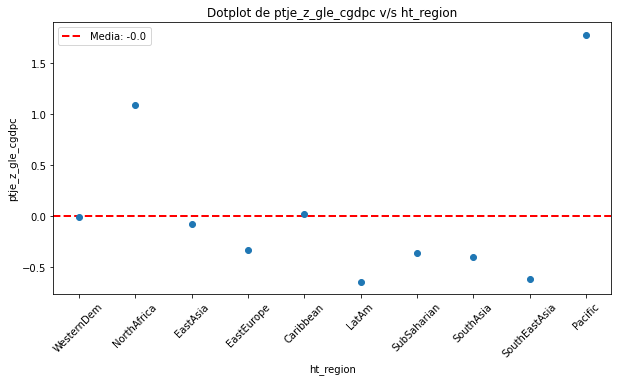

In [55]:
func.graficar_dotplot(df, nombre_nueva_col, "ht_region", statistic='mean',global_stat=True)

---
**5) Generar curvas de Densidad de Probabilidad (2 puntos).**

- Cree una función que permita visualizar las curvas de Densidad de Probabilidad
para las variables `imf_pop`, `gle_cgdpc` y `wdi_exph`.
- La función debe contener como argumentos:
    * `df`: Tabla de datos 1.
    * `variable`: Variable a contrastar.


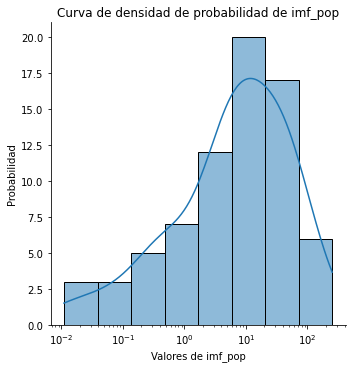

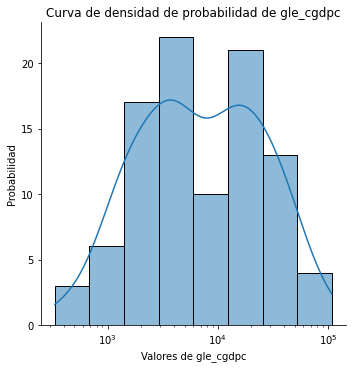

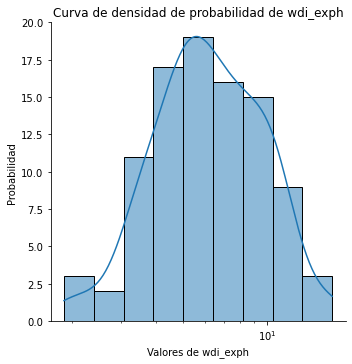

In [75]:
lista_variables = ["imf_pop", "gle_cgdpc" , "wdi_exph"]
def curvas_densidad_probabilidad(df, variable, log_scale=False):
    sns.displot(df[variable], kde=True, rug_kws={'linewidth': 15, 'alpha': 1},log_scale=log_scale)
    plt.xlabel(f'Valores de {variable}')
    plt.ylabel('Probabilidad')
    plt.title(f'Curva de densidad de probabilidad de {variable}')
    plt.show()

_ = pd.Series(lista_variables).apply(lambda x: curvas_densidad_probabilidad(df, x, log_scale=True))